In [3]:
cd ..

C:\Users\johan\github\designresolver


In [43]:
from testgraph import Ein, Eout, Rin
from graphutils import flat_graph_formulation, Node, VAR
import matplotlib.pyplot as plt

In [44]:
from collections import OrderedDict

In [54]:
g = flat_graph_formulation(Ein, Eout, Rin)

In [55]:
g = nx.relabel_nodes(g, {Node(1,VAR): Node('longtest',VAR)})

In [56]:
import sympy.printing as printing
import networkx as nx

In [57]:
def generate_label(elt, latexlabel=True):
    if latexlabel:
        return r'${}$'.format(elt if isinstance(elt, str) else printing.latex(elt))
    else:
        return r'${}$'.format(str(elt))

In [58]:
pos=None
edge_color='k'
width=2
arc=None
figsize=(6,6) 
prog='neato'
node_size=700
node_shape='b'
latexlabels=False
node_color = 'w'
linewidths=2
kwargs=dict()

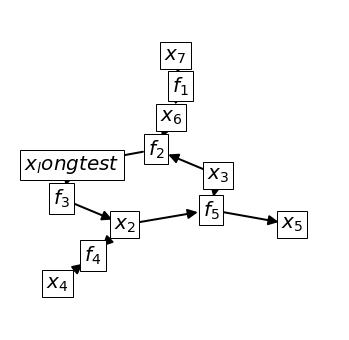

In [64]:
node_actual_shape = node_shape
label_kwargs = {
    'font_size': 20
}
if node_shape == 'b':
    node_actual_shape = 's'
    node_color = 'none'
    linewidths=0
    label_kwargs['bbox'] = dict(facecolor="white", edgecolor='black', boxstyle='square,pad=0.2')


labels = OrderedDict([(elt,generate_label(elt, latexlabel=latexlabels)) for elt in g.nodes])
if pos is None:
    pos = nx.drawing.nx_pydot.graphviz_layout(g, prog=prog, **kwargs)
fig = plt.figure(figsize=figsize)
plt.margins(0.15)
if isinstance(node_shape, dict):
    for node, shape in node_shape.items():
        nx.draw_networkx_nodes(g, pos=pos, node_size=node_size, node_color=node_color, linewidths=linewidths, edgecolors='k', node_shape=shape, nodelist=[node])
else:
    nx.draw_networkx_nodes(g, pos=pos, node_size=node_size, node_color=node_color, linewidths=linewidths, edgecolors='k', node_shape=node_actual_shape)
#https://stackoverflow.com/questions/22785849/drawing-multiple-edges-between-two-nodes-with-networkx
connectionstyle = 'arc3, rad = {}'.format(arc) if arc else 'arc3'
nx.draw_networkx_edges(g, pos=pos, arrowsize=20, width=width, 
    edge_color=edge_color, node_size=node_size, connectionstyle=connectionstyle)
nx.draw_networkx_labels(g, pos, labels, **label_kwargs)
plt.gca().axis("off");